# Import Librarys and Files

In [1]:
import ROOT as r
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
from tqdm.notebook import tqdm 

import utils.utils as utils
import utils.plotting_utils as plotting_utils
from models.event_patterns import EventPatterns
from models.pattern import Pattern
from models.vertex import Vertex
from models.tracklet import Tracklet
from models.hit import Hit

In [2]:
PI_ROOT_DICT_PATH = "/home/jack/large_projects/simulation/install/lib/libPiRootDict.so" #Change to match system path
r.gSystem.Load(PI_ROOT_DICT_PATH)

0

In [3]:
file_pattern_finding = "/home/jack/large_projects/simulation/workspace/playground/reco_tests/all_rec_pimunu_algor.root"  # CHANGE THIS
file_truth_pattern_finding = "/home/jack/large_projects/simulation/workspace/playground/reco_tests/all_rec_pimunu_truth.root"  # CHANGE THIS

# Print creation time for each file
utils.print_file_creation_time(file_pattern_finding)
utils.print_file_creation_time(file_truth_pattern_finding)

file_pf=r.TFile(file_pattern_finding,"READ")
file_truth_pf=r.TFile(file_truth_pattern_finding,"READ")


The file '/home/jack/large_projects/simulation/workspace/playground/reco_tests/all_rec_pimunu_algor.root' was created on: 2025-04-07 00:54:16
The file '/home/jack/large_projects/simulation/workspace/playground/reco_tests/all_rec_pimunu_truth.root' was created on: 2025-04-07 00:54:16


# Create Python Structure from Event Data

## Initialize Event Patterns Object

In [17]:
# Initialize Event patterns without tracklet, vertex, and pattern forming algorithms (we'll add them later)
event_index = 0
event_patterns = EventPatterns(event_index, None, None, None)

# For "normal use" you'd just initialize with all 3 pattern forming algorithms here, then call event_patterns.form_all(file, index)
# Below, we go through each step instead:


## Create tracklets for an event

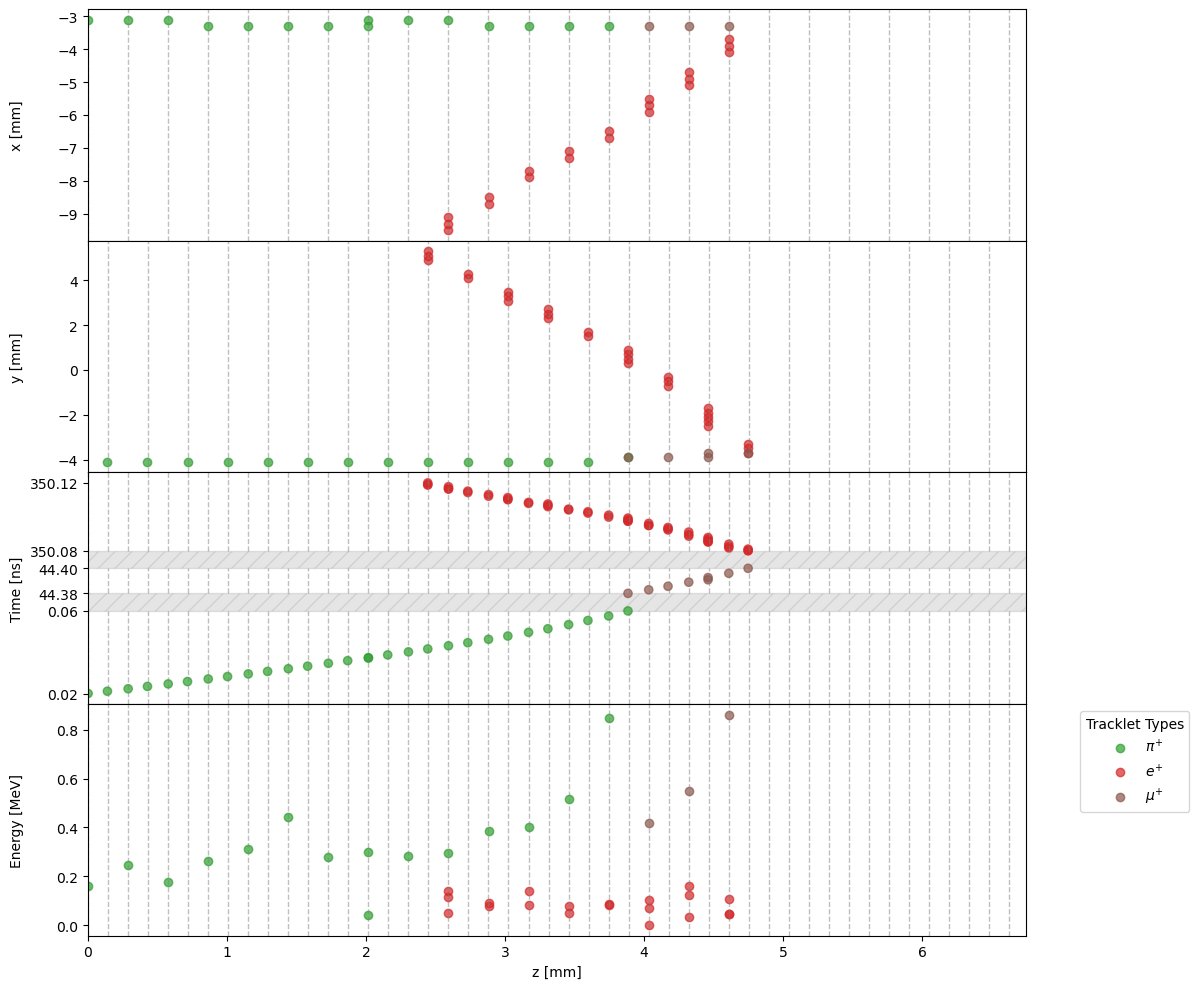

Extra event info:
{'stage': <Stage.TRACKLETS_FORMED: 1>, 'tracklet_algorithm_info': {}}


In [69]:
# Choose a tracklet forming algorithm, I'm use this default one, but you can write your own child class of TrackletFormer
from algorithms.tracklet.default_tracklet_former import DefaultTrackletFormer
event_patterns.tracklet_former = DefaultTrackletFormer()
event_patterns.form_tracklets(file_pf, event_index)

# Plot the tracklets
reload(plotting_utils)
plotting_utils.plot_event(event_patterns)

# See the extra info stored at this point
print("Extra event info:")
print(event_patterns.extra_info)

## Create Vertices from Tracklets

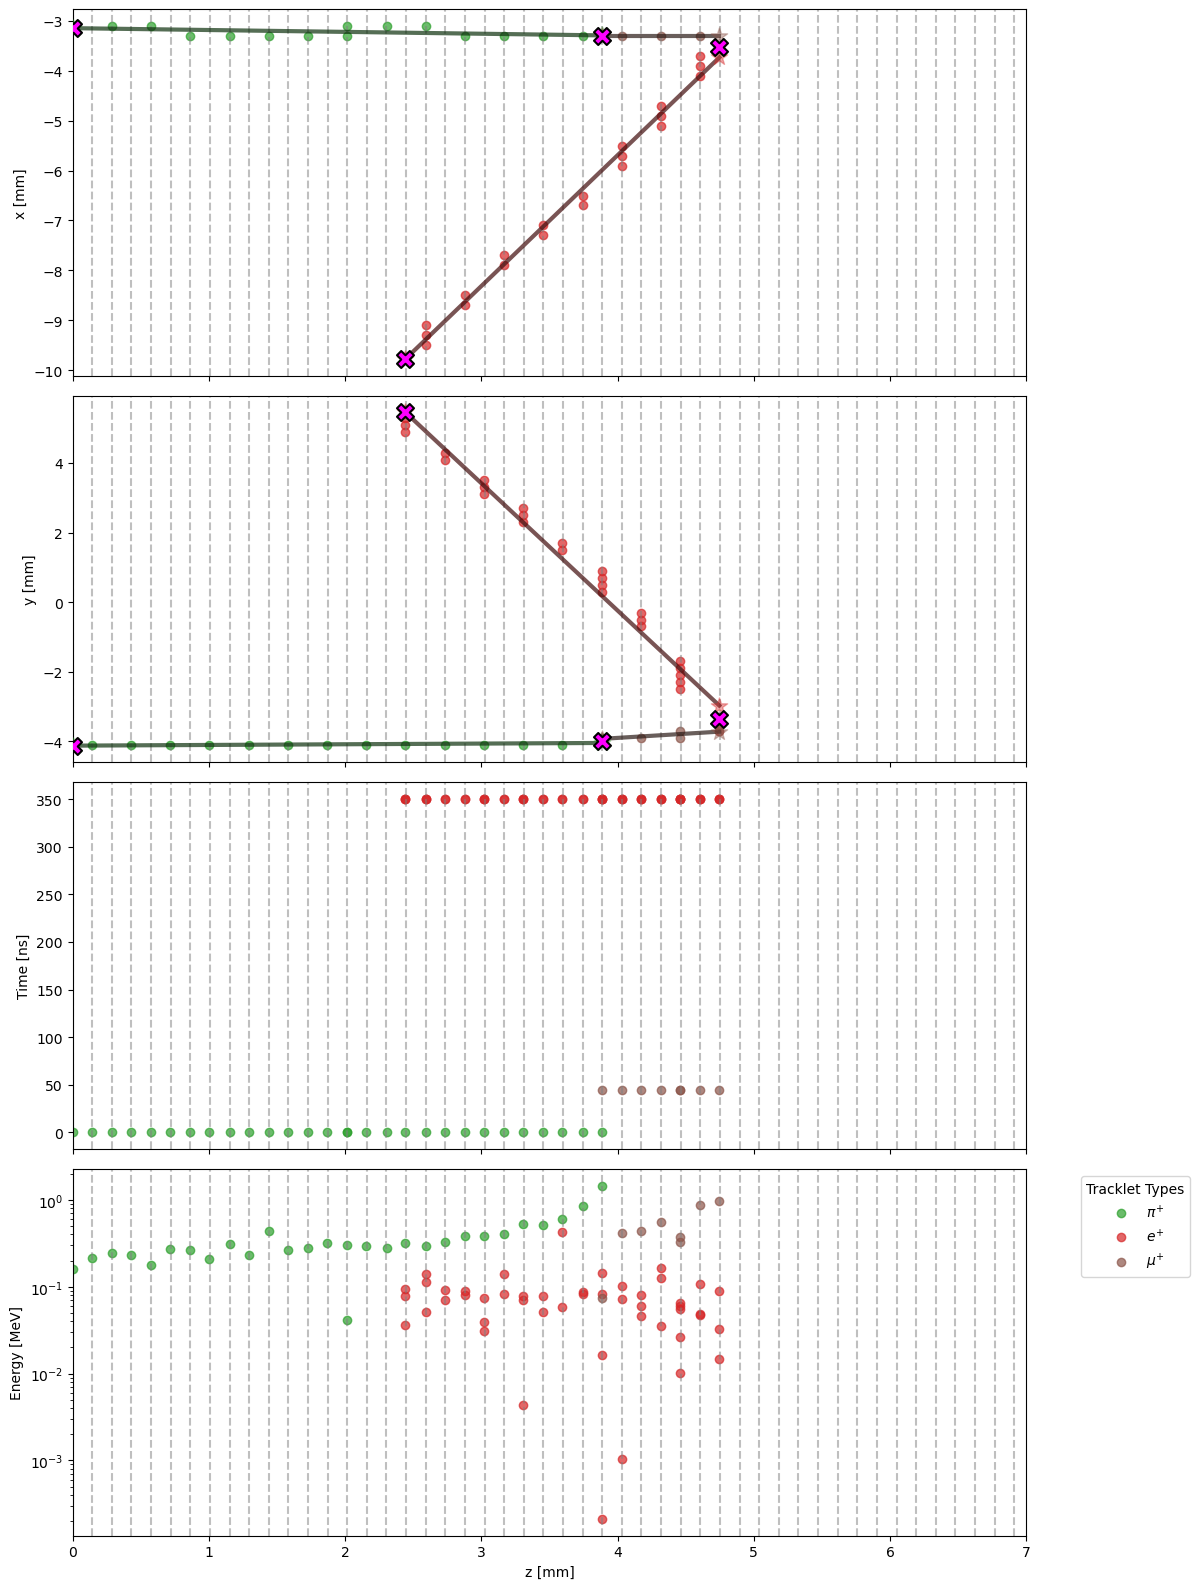

Extra event info:
{'stage': <Stage.VERTICES_FORMED: 2>, 'tracklet_algorithm_info': {}, 'vertex_algorithm_info': {'vertex_comparison': {'only_in_front': set(), 'only_in_back': set(), 'match': True}, 'stats': {'front': {'BIC': 17.06337728699699, 'k': 4, 'centroids': array([[-3.14999992e+00,  0.00000000e+00,  5.00000715e-04],
       [-9.77153052e+00,  0.00000000e+00,  2.44350011e+00],
       [-3.51820971e+00,  0.00000000e+00,  4.74749977e+00],
       [-3.29722837e+00,  0.00000000e+00,  3.88349993e+00]])}, 'back': {'BIC': 18.762034231311723, 'k': 4, 'centroids': array([[ 0.00000000e+00, -3.34866460e+00,  4.74749977e+00],
       [ 0.00000000e+00, -4.12561496e+00,  5.00000715e-04],
       [ 0.00000000e+00, -3.98967037e+00,  3.88349993e+00],
       [ 0.00000000e+00,  5.45547879e+00,  2.44350011e+00]])}}}}


In [13]:
# Choose a vertex forming algorithm, I'm using this kmeans one, but you can write your own child class of VertexFormer
from algorithms.vertex.kmeans_vertex_former import KMeansVertexFormer
event_patterns.vertex_former = KMeansVertexFormer()

event_patterns.form_vertices()

reload(plotting_utils)
plotting_utils.plot_event(event_patterns)

# See the extra info stored at this point
print("Extra event info:")
print(event_patterns.extra_info)

## Create Patterns from Vertices

In [ ]:
# Choose a pattern forming algorithm, I'm using this default one, but you can write your own child class of PatternFormer
from algorithms.pattern.default_pattern_former import DefaultPatternFormer
event_patterns.pattern_former = DefaultPatternFormer()
event_patterns.form_patterns()

# Print patterns and the unique tracklets within each pattern along with vertex information
patterns = event_patterns.get_patterns()
for pattern in patterns:
    print(f"\nPattern with {len(pattern.get_vertices())} vertices.")

    # Print info for each vertex in the pattern
    for vertex in pattern.get_vertices():
        tracklet_ids = [t.tracklet_id for t in vertex.get_tracklets()]
        print(f"  Vertex {vertex.vertex_id} (tracklet_ids={tracklet_ids})")

    print("  Unique Tracklets:")
    unique_tracklets = pattern.get_unique_tracklets()
    for tracklet in unique_tracklets:
        print(f"    {tracklet}")


# See the extra info stored at this point
print()
print("Extra event info:")
print(event_patterns.extra_info)